# Statistical Analysis

Load the data

In [1]:
from cesnet_datazoo.datasets import CESNET_QUIC22, CESNET_TLS22
from cesnet_datazoo.config import DatasetConfig

dataset = CESNET_QUIC22(data_root="data/CESNET_QUIC22/", size="XS", silent=True)

dataset_config = DatasetConfig(
    dataset=dataset,
    train_period_name="W-2022-44",
    train_size=100_000,
    use_packet_histograms=True,
)
dataset.set_dataset_config_and_initialize(dataset_config)

data_df = dataset.get_train_df()

data_df.columns

Index(['PPI', 'BYTES', 'BYTES_REV', 'PACKETS', 'PACKETS_REV', 'DURATION',
       'PPI_LEN', 'PPI_ROUNDTRIPS', 'PPI_DURATION', 'FLOW_ENDREASON_IDLE',
       'FLOW_ENDREASON_ACTIVE', 'FLOW_ENDREASON_OTHER', 'PSIZE_BIN1',
       'PSIZE_BIN2', 'PSIZE_BIN3', 'PSIZE_BIN4', 'PSIZE_BIN5', 'PSIZE_BIN6',
       'PSIZE_BIN7', 'PSIZE_BIN8', 'PSIZE_BIN1_REV', 'PSIZE_BIN2_REV',
       'PSIZE_BIN3_REV', 'PSIZE_BIN4_REV', 'PSIZE_BIN5_REV', 'PSIZE_BIN6_REV',
       'PSIZE_BIN7_REV', 'PSIZE_BIN8_REV', 'IPT_BIN1', 'IPT_BIN2', 'IPT_BIN3',
       'IPT_BIN4', 'IPT_BIN5', 'IPT_BIN6', 'IPT_BIN7', 'IPT_BIN8',
       'IPT_BIN1_REV', 'IPT_BIN2_REV', 'IPT_BIN3_REV', 'IPT_BIN4_REV',
       'IPT_BIN5_REV', 'IPT_BIN6_REV', 'IPT_BIN7_REV', 'IPT_BIN8_REV', 'APP'],
      dtype='object')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

head

In [3]:
data_df.head()

,PPI,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI_LEN,PPI_ROUNDTRIPS,PPI_DURATION,FLOW_ENDREASON_IDLE,...,IPT_BIN8,IPT_BIN1_REV,IPT_BIN2_REV,IPT_BIN3_REV,IPT_BIN4_REV,IPT_BIN5_REV,IPT_BIN6_REV,IPT_BIN7_REV,IPT_BIN8_REV,APP
0,"[[0.0, 3.0, 0.0, 0.0, 0.0, 111.0, 0.0, 220.0, ...",6040.0,9644.0,17.0,14.0,0.516582,30.0,5.0,0.504,1.0,...,0.0,9.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,31
1,"[[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0,...",4577.0,2998.0,12.0,15.0,1.469174,27.0,7.0,1.469,1.0,...,0.0,10.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,32
2,"[[0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 47.0, 1.0, 0.0...",2692.0,7346.0,5.0,7.0,0.086534,12.0,2.0,0.087,1.0,...,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22
3,"[[0.0, 10.0, 1.0, 1.0, 0.0, 0.0, 0.0, 9.0, 0.0...",9732.0,86583.0,84.0,122.0,26.039257,30.0,1.0,0.024,1.0,...,4.0,111.0,4.0,1.0,0.0,0.0,0.0,1.0,4.0,100
4,"[[0.0, 21.0, 9.0, 0.0, 6.0, 0.0, 0.0, 8.0, 11....",2012.0,2439.0,5.0,6.0,0.093410,11.0,4.0,0.094,1.0,...,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,91


describe

In [4]:
data_df.describe(percentiles=[0.05, 0.25, 0.5, 0.95, 0.99])

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION,PPI_LEN,PPI_ROUNDTRIPS,PPI_DURATION,FLOW_ENDREASON_IDLE,FLOW_ENDREASON_ACTIVE,...,IPT_BIN8,IPT_BIN1_REV,IPT_BIN2_REV,IPT_BIN3_REV,IPT_BIN4_REV,IPT_BIN5_REV,IPT_BIN6_REV,IPT_BIN7_REV,IPT_BIN8_REV,APP
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,1.639926e+04,1.692565e+05,44.652401,150.649124,9.468164,23.137939,4.55137,3.253521,0.994600,0.005060,...,0.830870,141.594635,2.737030,2.216220,1.055980,0.649340,0.31633,0.235840,0.843510,52.756530
std,6.881355e+05,2.636015e+06,626.005371,2088.689941,29.605572,7.269448,1.87504,12.313560,0.073286,0.070954,...,2.568979,2076.983398,12.833291,8.626863,4.263467,3.261657,1.50824,0.990399,2.566259,23.659168
min,1.228000e+03,5.900000e+01,1.000000,1.000000,0.000175,2.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5%,1.614000e+03,2.345000e+03,5.000000,5.000000,0.036386,10.000000,2.00000,0.026000,1.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,15.000000
25%,2.730000e+03,3.244000e+03,8.000000,9.000000,0.094604,17.000000,3.00000,0.078000,1.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,32.000000
50%,4.178500e+03,5.257000e+03,12.000000,13.000000,0.218190,25.000000,4.00000,0.156000,1.000000,0.000000,...,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,55.000000
95%,3.524730e+04,2.497760e+05,113.050000,257.000000,47.367260,30.000000,8.00000,19.466300,1.000000,0.000000,...,4.000000,222.000000,9.000000,8.000000,4.000000,3.000000,2.00000,1.000000,4.000000,99.000000
99%,1.332815e+05,3.132121e+06,541.000000,2628.030000,135.988821,30.000000,10.00000,51.949011,1.000000,0.000000,...,10.000000,2545.030000,33.000000,22.000000,14.000000,9.000000,5.00000,4.000000,9.000000,100.000000
max,2.060549e+08,6.242670e+08,162848.000000,489305.000000,356.115967,30.000000,15.00000,291.115997,1.000000,1.000000,...,148.000000,487923.000000,1451.000000,1492.000000,391.000000,366.000000,139.00000,51.000000,147.000000,100.000000


download or upload

In [5]:
download_upload_df = data_df.copy(False)

# create a new column to indicate the direction of the flow, default is None
download_upload_df[["DIRECTION"]] = "BOTH"

coefficient = 0.9

# set the direction of the flow based on the nubmer of bytes
download_upload_df.loc[download_upload_df["BYTES"] * coefficient > download_upload_df["BYTES_REV"], "DIRECTION"] = "UPLOAD"
download_upload_df.loc[download_upload_df["BYTES"] < download_upload_df["BYTES_REV"] * coefficient, "DIRECTION"] = "DOWNLOAD"

download_upload_df["DIRECTION"].value_counts()

DIRECTION
DOWNLOAD    64765
UPLOAD      25133
BOTH        10102
Name: count, dtype: int64

most popular apps

In [6]:
app_counts_df = data_df.copy(False)

app_counts_df[["APP_NAME"]] = None

# get the app number from 'app' column and translate it using the 'app_labels' dictionary
app_counts_df["APP_NAME"] = app_counts_df["APP"].apply(lambda x: dataset._tables_app_enum.get(x, "Unknown"))

app_counts_df["APP_NAME"].value_counts()

APP_NAME
bongacams                6830
cloudflare-cdnjs         6355
alza-identity            6323
flightradar24            6110
playradio                5551
                         ... 
google-authentication       9
instagram                   9
ebay-kleinanzeigen          9
google-autofill             8
uber                        7
Name: count, Length: 101, dtype: int64

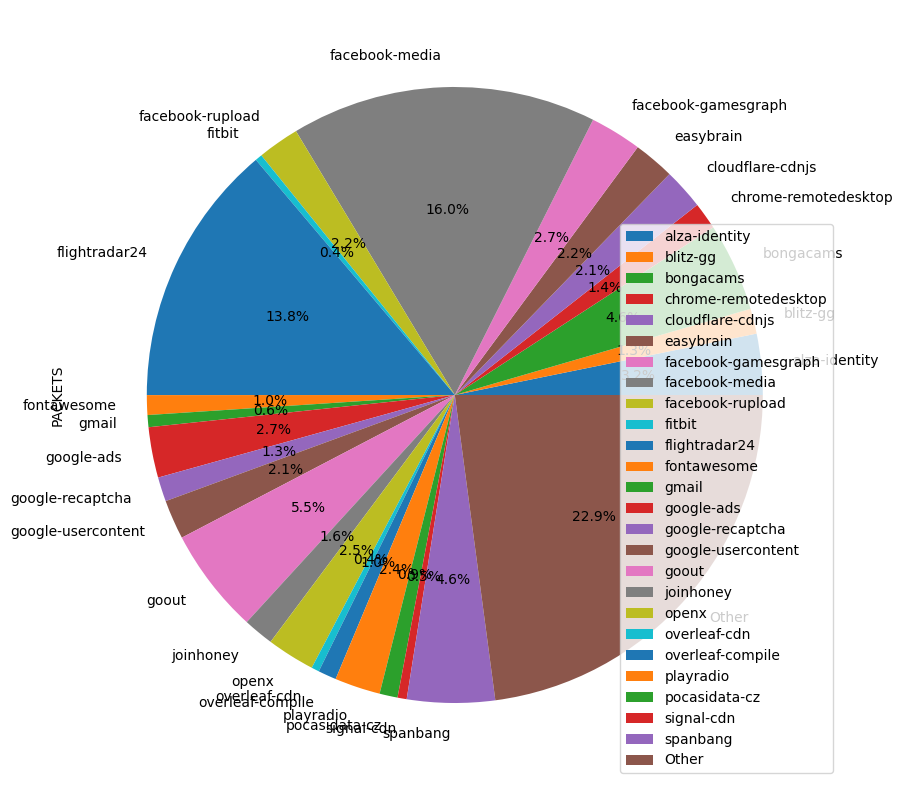

In [7]:
# pie chart of the most popular apps, apps with less than 1000 packets are grouped into 'Other' category
app_counts_df_pie = app_counts_df.copy(True)

app_counts_df_pie = app_counts_df_pie[app_counts_df_pie["APP_NAME"].isin(app_counts_df["APP_NAME"].value_counts().index[app_counts_df["APP_NAME"].value_counts() > 1000])]
app_counts_df_pie = app_counts_df_pie[["APP_NAME", "PACKETS"]].groupby(by="APP_NAME").sum()

app_counts_df_pie.loc["Other"] = app_counts_df[~app_counts_df["APP_NAME"].isin(app_counts_df_pie.index)]["PACKETS"].sum()

app_counts_df_pie.plot.pie(y="PACKETS", figsize=(10, 10), autopct='%1.1f%%')

del app_counts_df_pie

calculate median of [bytes, bytes_rev, packets, packets_rev, duration] for each app

In [8]:
app_median_df = app_counts_df.copy(True)

app_median_df = app_median_df[["APP_NAME", "BYTES", "BYTES_REV", "PACKETS", "PACKETS_REV", "DURATION"]].groupby(by="APP_NAME").median()

app_median_df

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION
APP_NAME,,,,,
4chan,4964.0,6421.0,11.0,12.0,0.329940
adavoid,5772.0,12802.0,16.0,21.0,1.271623
alza-identity,3986.0,6985.0,13.0,13.0,0.255390
alza-webapi,1228.0,87.0,1.0,1.0,0.005849
alza-www,4805.0,5940.0,11.0,13.0,0.253505
...,...,...,...,...,...
unpkg,4764.5,8823.5,17.0,18.0,2.087030
vkontakte,3352.0,2509.0,7.0,6.0,0.065330
whatsapp,2927.0,3308.0,9.0,8.5,0.086926


# Feature Engineering

Bytes per packet

In [14]:
app_counts_df["BYTES_PER_PACKET"] = app_counts_df["BYTES"] / app_counts_df["PACKETS"]
app_counts_df["BYTES_PER_PACKET_REV"] = app_counts_df["BYTES_REV"] / app_counts_df["PACKETS_REV"]

Medians

In [16]:
app_counts_df[["APP_NAME", "BYTES_PER_PACKET", "BYTES_PER_PACKET_REV"]].groupby(by="APP_NAME").median()

,BYTES_PER_PACKET,BYTES_PER_PACKET_REV
APP_NAME,,
4chan,422.272736,641.900024
adavoid,317.970245,816.153870
alza-identity,309.875000,483.000000
alza-webapi,1228.000000,87.000000
alza-www,460.818176,495.750000
...,...,...
unpkg,272.323303,604.299194
vkontakte,478.714294,418.166656
whatsapp,418.875000,406.687500
